# Predicting House Price By Machine Learning

# Problem Statsment: -
    
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

# Business Goal: -

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [119]:
import pandas as pd
import numpy as np

In [120]:
df=pd.read_csv('flip_house_train.csv')
df1=pd.read_csv('flip_house_test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [122]:
#Test Dataset
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [123]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From this describe we can see the distribution or how our data is spread.34900 is min SalePrice and 755000 is max salePrice.which show saleprice is spreaded too much.

In [124]:
#Missinf Features of Train Dataset
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

LotFrontage 18.3219 % missing values
Alley 93.4075 % missing values
MasVnrType 0.5993 % missing values
MasVnrArea 0.5993 % missing values
BsmtQual 2.5685 % missing values
BsmtCond 2.5685 % missing values
BsmtExposure 2.6541 % missing values
BsmtFinType1 2.5685 % missing values
BsmtFinType2 2.6541 % missing values
FireplaceQu 47.1747 % missing values
GarageType 5.4795 % missing values
GarageYrBlt 5.4795 % missing values
GarageFinish 5.4795 % missing values
GarageQual 5.4795 % missing values
GarageCond 5.4795 % missing values
PoolQC 99.4007 % missing values
Fence 79.7089 % missing values
MiscFeature 96.2329 % missing values


Drop that columns who having more than 50% missing data.

In [125]:
df.drop(['MiscFeature','Fence','PoolQC','Alley','Id'],axis=1,inplace=True)

In [126]:
#Missing Features of TestData Set
missing_features=[features for features in df1.columns if df1[features].isnull().sum()>1]

for feature in missing_features:
    print(feature,np.round(df1[feature].isnull().mean()*100,4),'% missing values')

LotFrontage 15.411 % missing values
Alley 95.2055 % missing values
BsmtQual 2.3973 % missing values
BsmtCond 2.3973 % missing values
BsmtExposure 2.3973 % missing values
BsmtFinType1 2.3973 % missing values
BsmtFinType2 2.3973 % missing values
FireplaceQu 47.6027 % missing values
GarageType 5.8219 % missing values
GarageYrBlt 5.8219 % missing values
GarageFinish 5.8219 % missing values
GarageQual 5.8219 % missing values
GarageCond 5.8219 % missing values
PoolQC 100.0 % missing values
Fence 84.9315 % missing values
MiscFeature 96.5753 % missing values


In [127]:
#Drop that columns whose having more than 50% missing columns.
df1.drop(['MiscFeature','Fence','PoolQC','Alley','Id'],axis=1,inplace=True)

In [128]:
#Divide Train Features into numerical,categorical,continues and year
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Length Of Categorical Features',len(categorical_features))
categorical_features

numerical_features=[features for features in df.columns if df[features].dtype!='O']
print('Length Of numerical features',len(numerical_features))
numerical_features



continues_features=[features for features in numerical_features if len(df[features].unique())>25]
print('Length Of continues features',len(continues_features))
continues_features

discreat_features=[features for features in numerical_features if len(df[features].unique())<25]
print('Length Of Discreat Features',len(discreat_features))
discreat_features


year_features=[features for features in numerical_features if 'Yr' in features or 'Year' in features]
print('Length Of Year Features',len(year_features))

Length Of Categorical Features 39
Length Of numerical features 37
Length Of continues features 19
Length Of Discreat Features 18
Length Of Year Features 4


In [129]:
#Divide Test Features into numerical,categorical,continues and year
categorical_features1=[features for features in df1.columns if df1[features].dtype=='O']
print('Length Of Categorical Features1',len(categorical_features1))
categorical_features1

numerical_features1=[features for features in df1.columns if df1[features].dtype!='O']
print('Length Of numerical features1',len(numerical_features1))
numerical_features1



continues_features1=[features for features in numerical_features1 if len(df1[features].unique())>25]
print('Length Of continues features1',len(continues_features1))
continues_features1

discreat_features1=[features for features in numerical_features1 if len(df1[features].unique())<25]
print('Length Of Discreat Features1',len(discreat_features1))
discreat_features1


year_features1=[features for features in numerical_features1 if 'Yr' in features or 'Year' in features]
print('Length Of Year Features1',len(year_features1))

Length Of Categorical Features1 39
Length Of numerical features1 36
Length Of continues features1 17
Length Of Discreat Features1 19
Length Of Year Features1 4


In [130]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Visualization

Univeriant Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

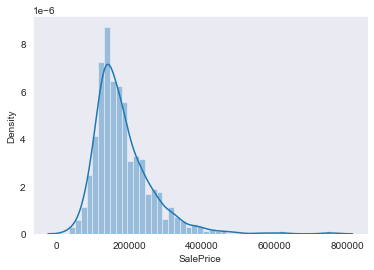

In [131]:
sns.distplot(df['SalePrice'])

From This chart we can say that SalePrice is not normally distributed.it is right skewed.(positiviness skewness)

In [132]:
print('Skew of Sale Price',df['SalePrice'].skew())
print('Outliers of Sale Price',df['SalePrice'].kurt())

Skew of Sale Price 1.953877705368286
Outliers of Sale Price 7.390656691648756


Sales Price data is highly right skewed and having heavy outliers.

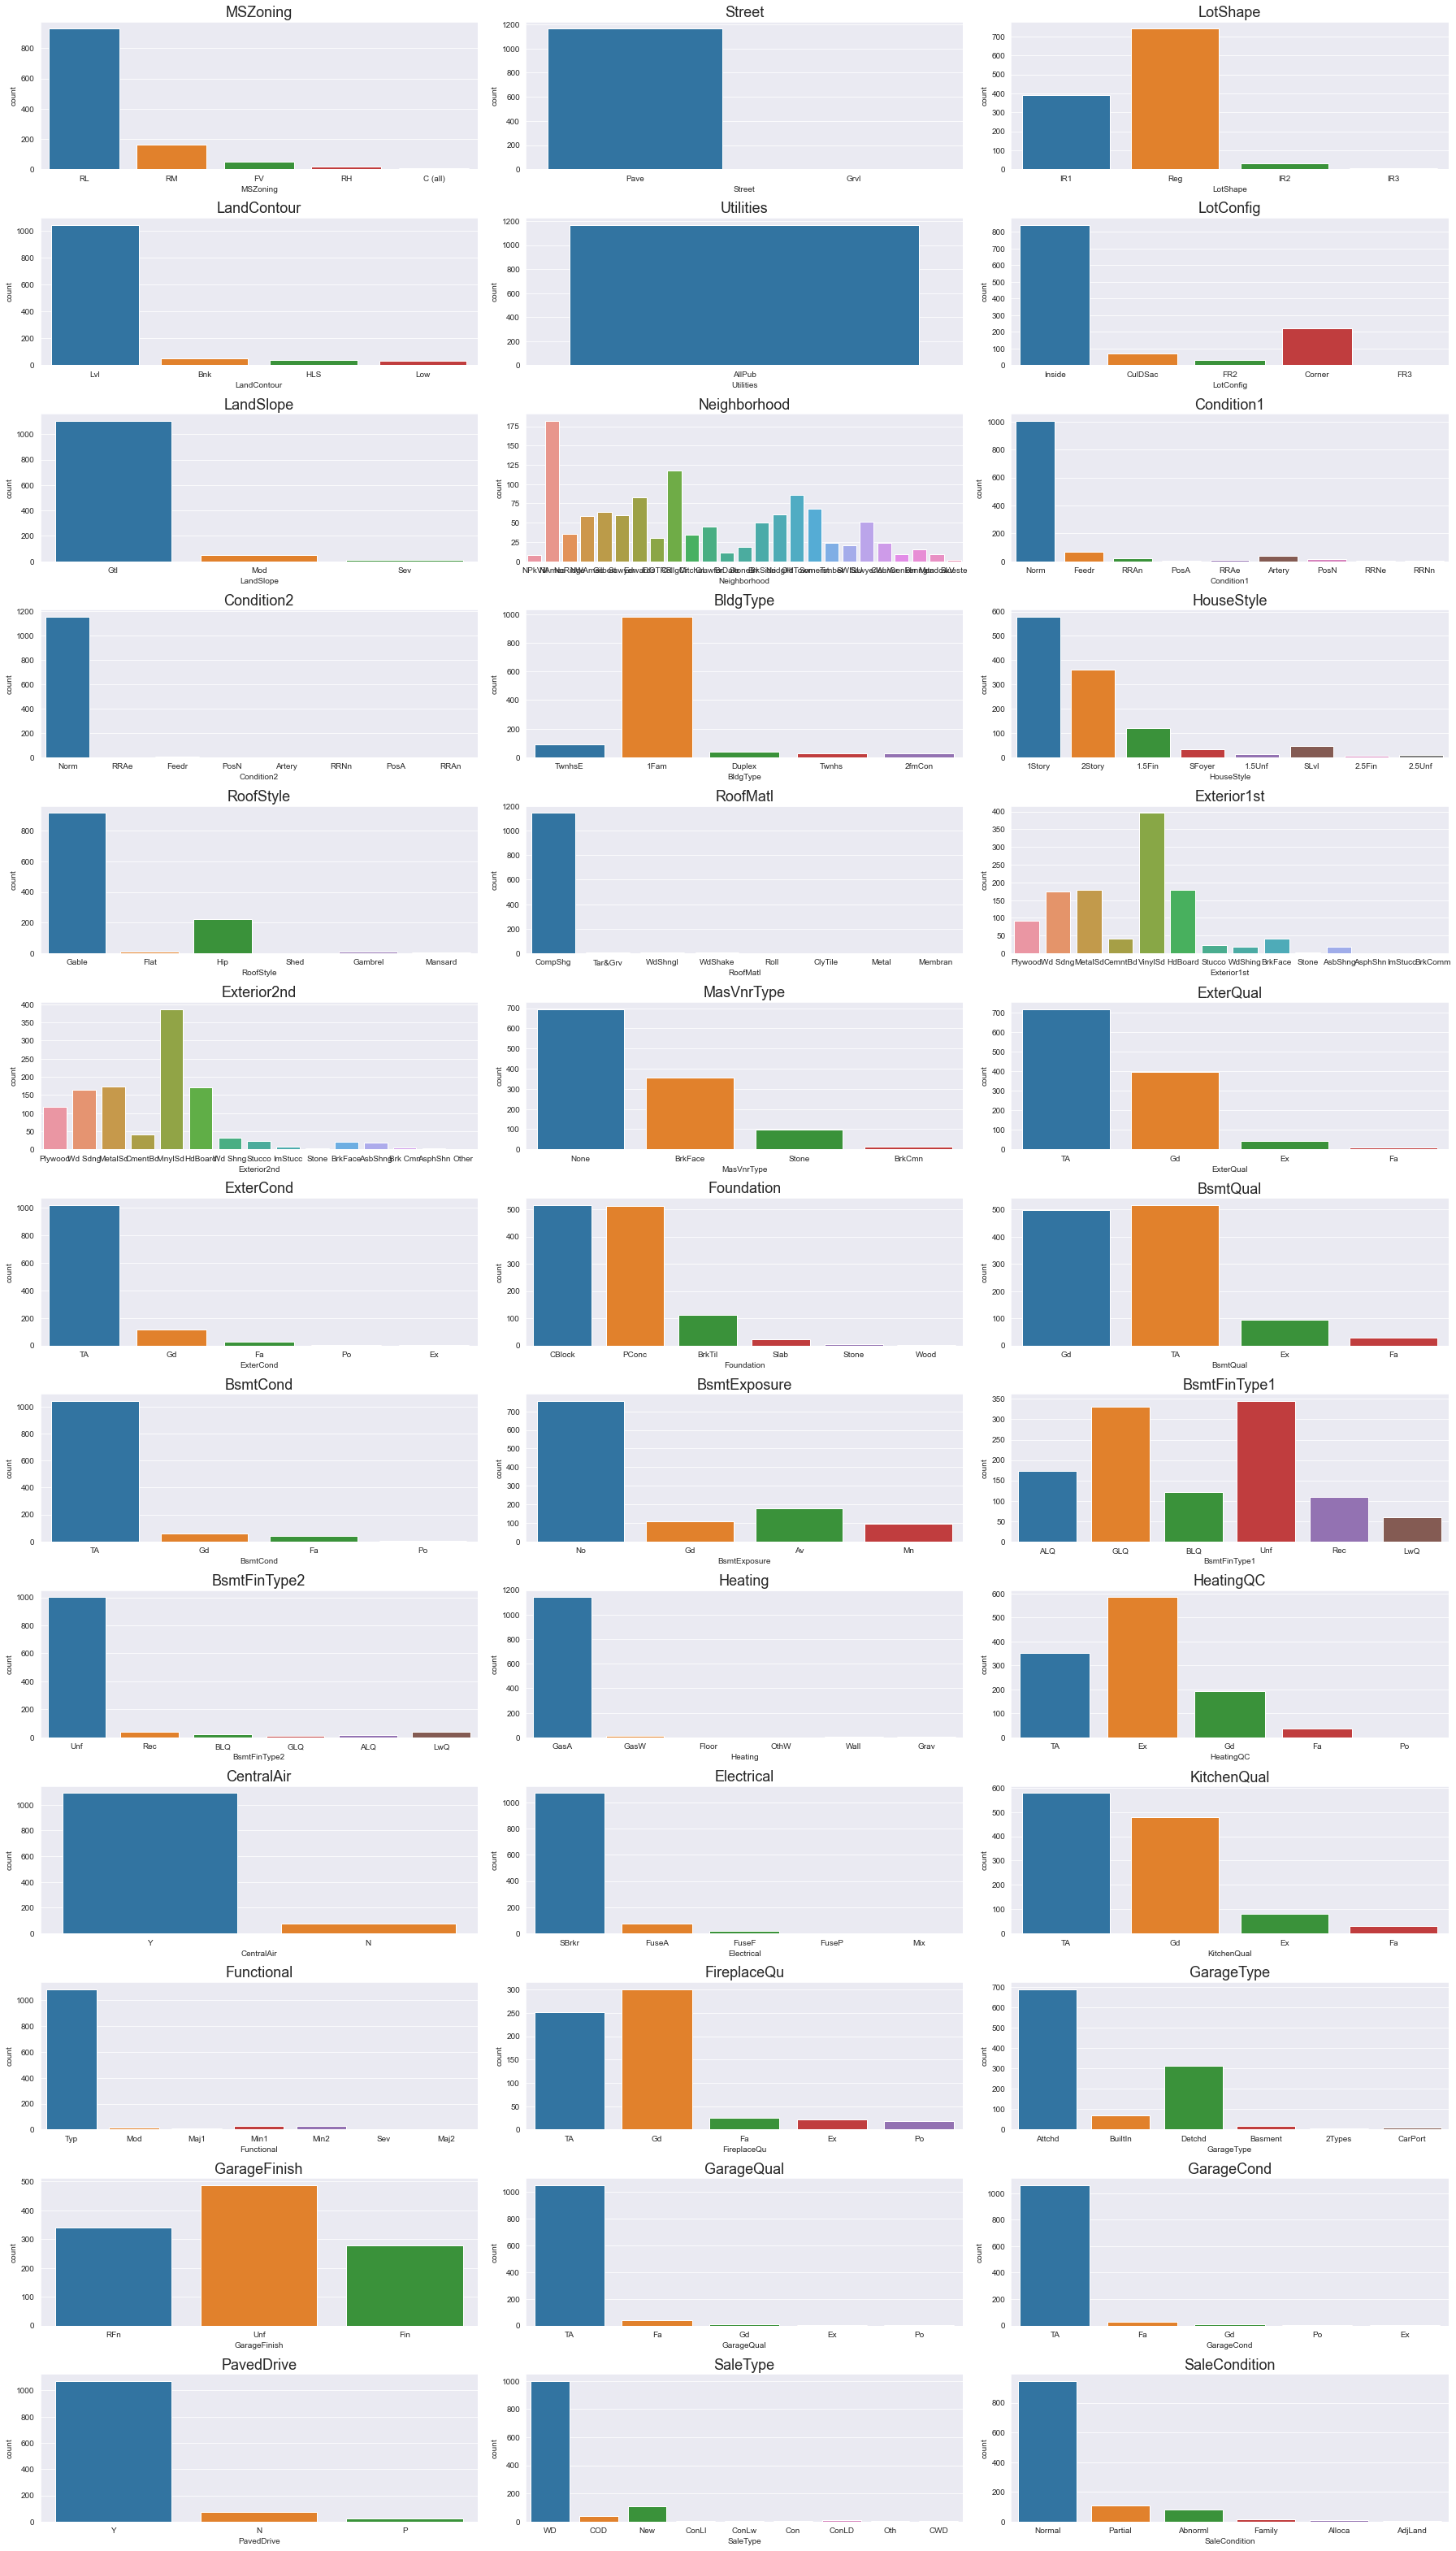

In [157]:
plt.figure(figsize=(25,50))
for i in range(len(categorical_features)):
    plt.subplot(15,3,i+1)
    sns.countplot(df[categorical_features[i]])
    plt.title(categorical_features[i],fontsize=18)
    plt.tight_layout()

# Observation:-

1) From MSZoning we conclude that Most of the people like to live in low dencity area.

2) Street near to home should be paved type.

3)Shape of the Most of House is Regural.

4) From the LandCounter most of the people like to live in Near Flat/level

5)From LotConf we can see that most people like inside plot and few like corner plot.

6)From the land slope we can say that most of people like general solpe

7)From the Roof Style most of the people like Glabe type roof

8)From RoofMat most of the house's  made from the clay or tile on roof

9)From Exterior1st and Exterior2nd i can say moslty people like Vinyl Siding and people also like Metal Siding and hard bord

10)From Foundatio most of the people like cinder block and poured concrete

11)From CenteralAir i can say moslty people like  centeraly air house

12)From the garage type mostly people like to attatched garage with house

13)From Electrical people like Standard Circuit Breakers & Romex 

14)From KitchenQual most people like Excellent type and few like Good also.

15)From the Sale Type most of the people like Warranty Deed - Conventional

16)Most people like nomal Sales Conditions.

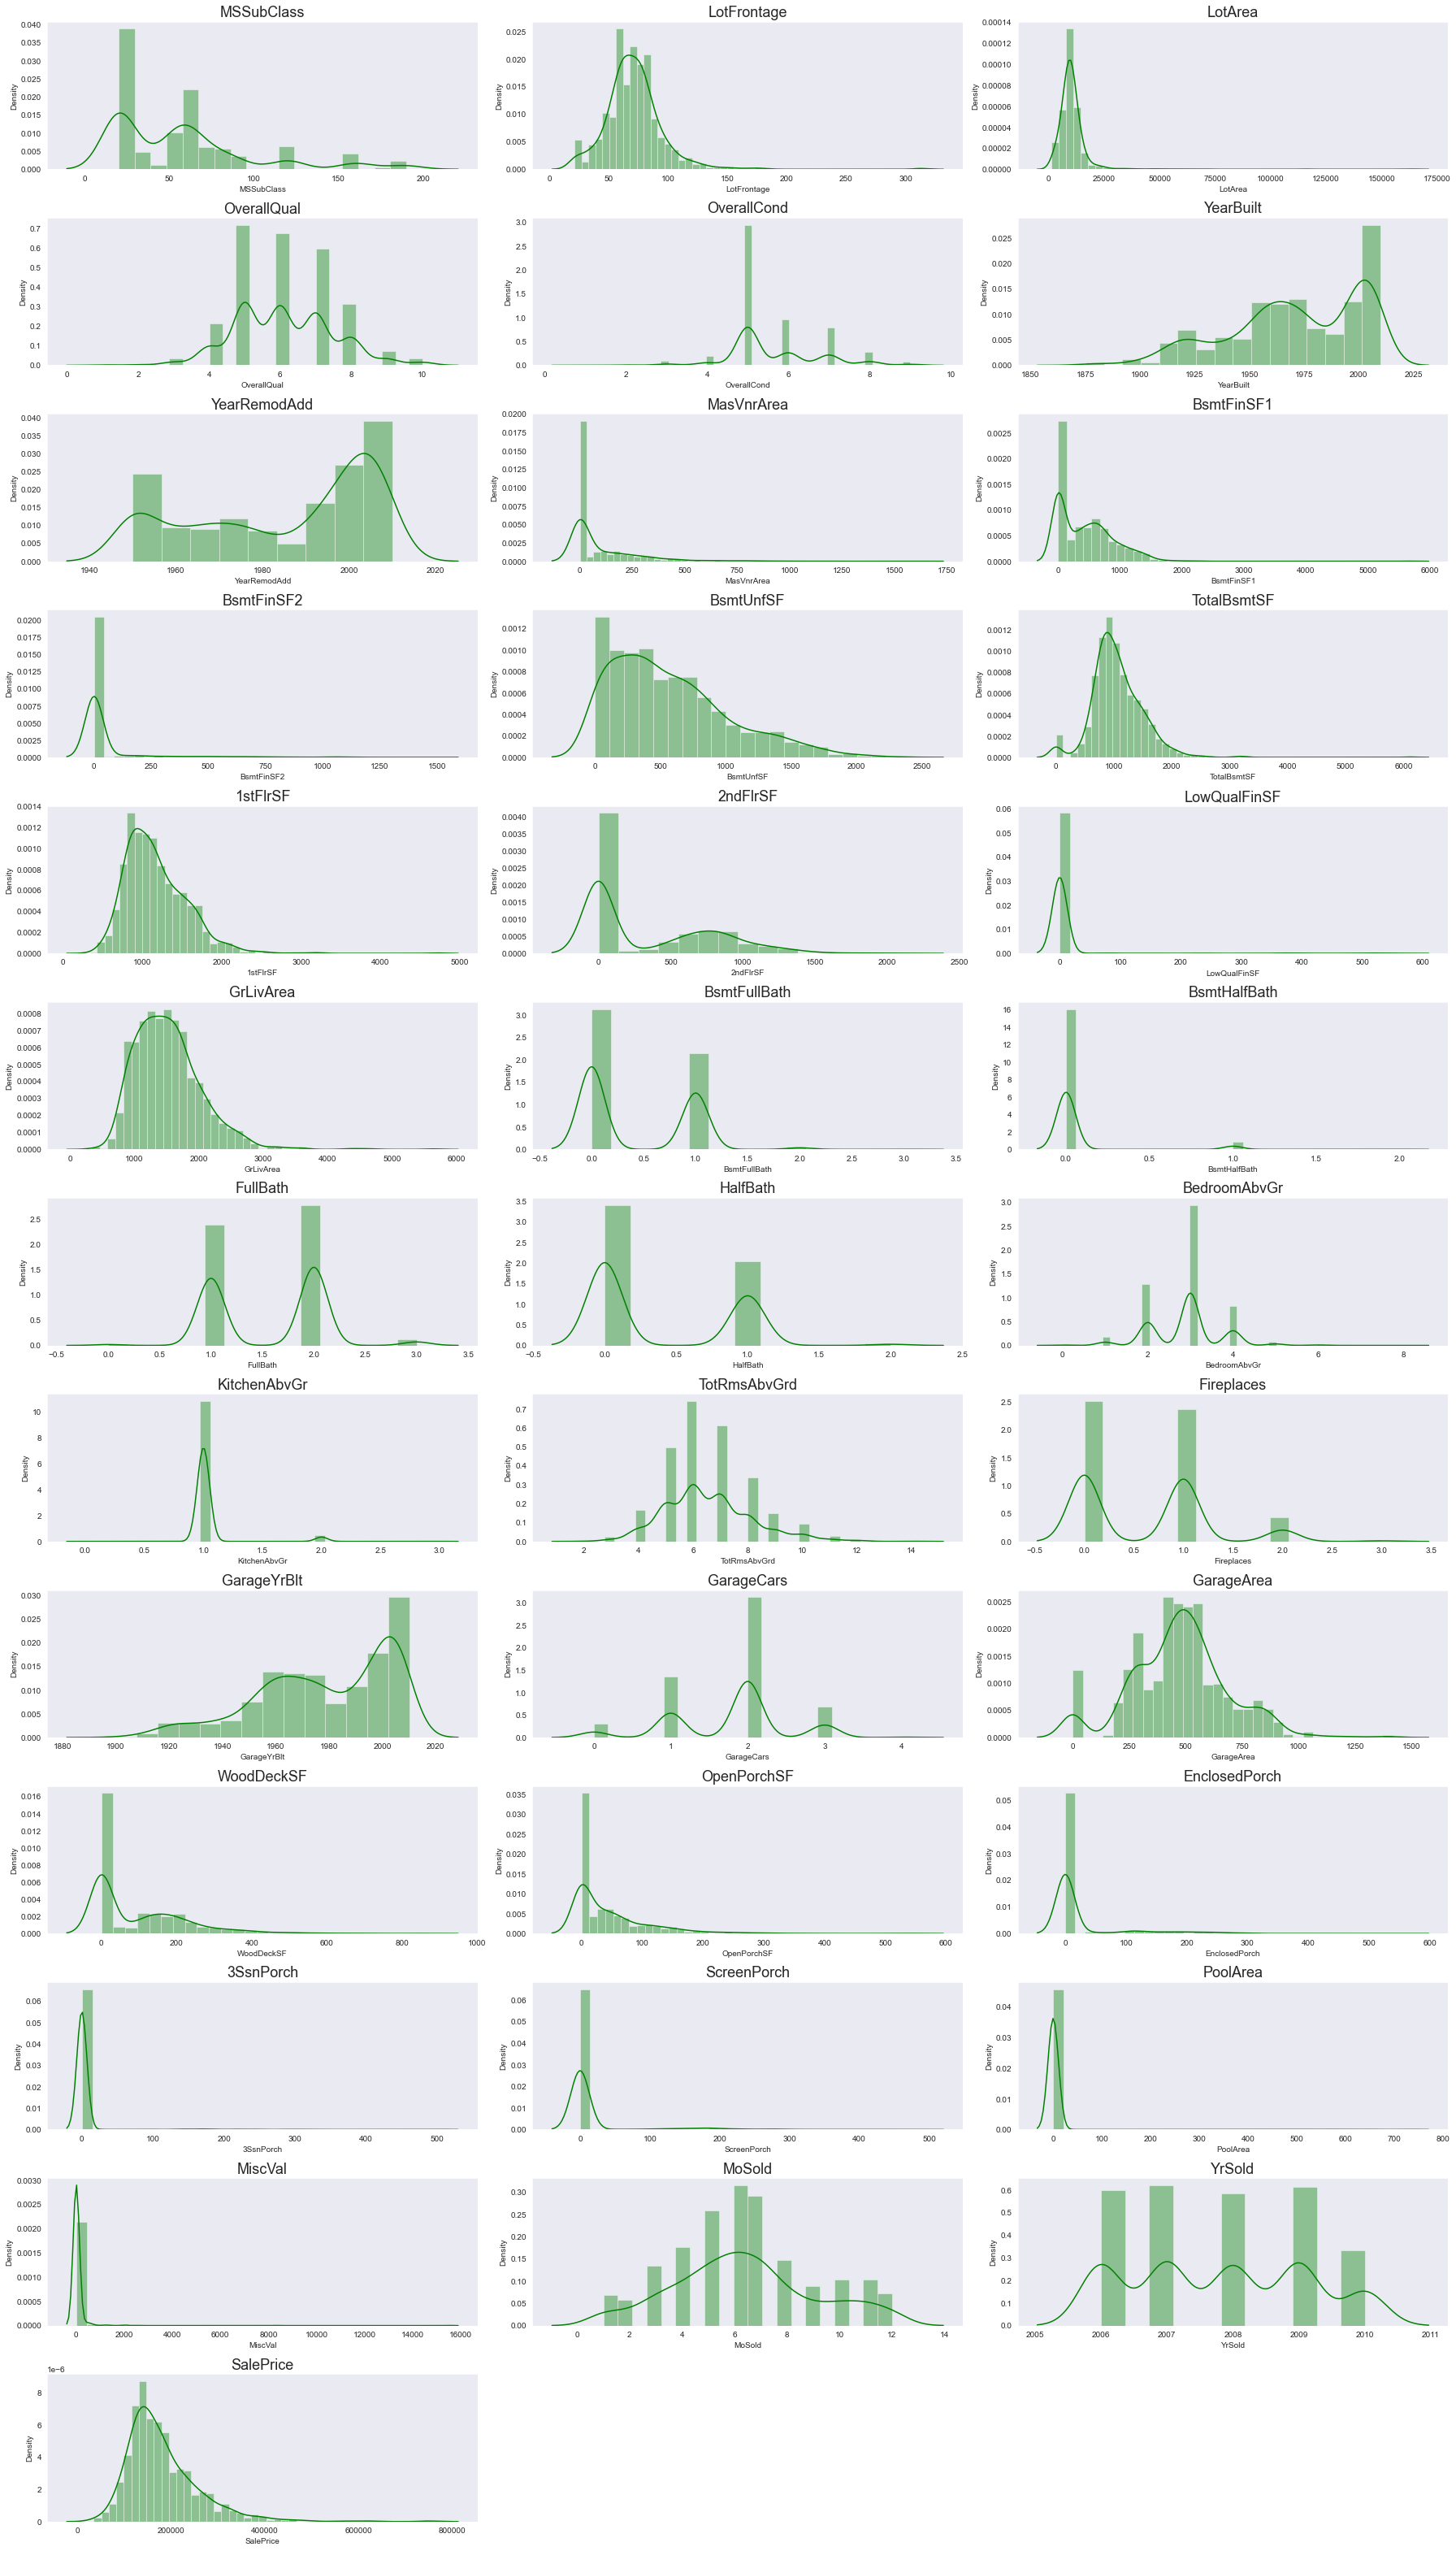

In [134]:
plt.figure(figsize=(25,50))
for i in range(len(numerical_features)):
    plt.subplot(15,3,i+1)
    sns.distplot(df[numerical_features[i]],color='green')
    plt.title(numerical_features[i],fontsize=18)
    plt.tight_layout()

# observation

1-From LotFrontage i cna say mostly people have value between 60-40

2-From LotArea i can say the value is between 0-25000

3-From Total square feet of basement area i can say the value is mostly in between 100-2000 and moslty people have the basement of size 800-1100

4-From grlivarea i can say moslty people have the are between 1200-1900

5-From GarageArea i can say mostly people like to have area between 450-600

6-From saleprice i can say moslty people buy home between price 140000-190000 and also it is right skewed

Biveriant Analysis

# Here we have 81 features so first find relation with target variable and from higher relation with SalePrice we will do analysis

In [135]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'LotArea vs SalePrice')

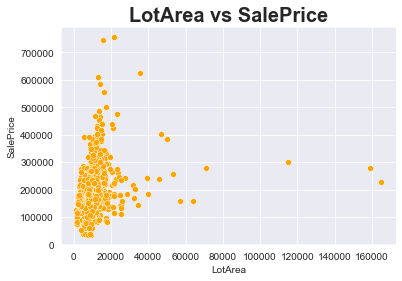

In [136]:
sns.set_style('darkgrid')
sns.scatterplot(df['LotArea'],df['SalePrice'],color='Orange')
plt.title('LotArea vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

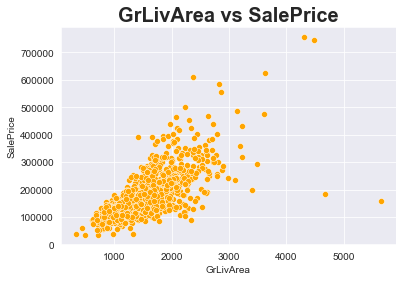

In [137]:
sns.set_style('darkgrid')
sns.scatterplot(df['GrLivArea'],df['SalePrice'],color='Orange')
plt.title('GrLivArea vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

As the Living area increases price also increases.

Text(0.5, 1.0, 'GarageArea vs SalePrice')

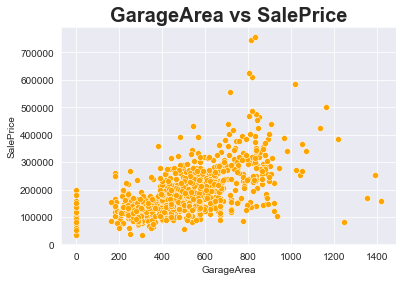

In [138]:
sns.set_style('darkgrid')
sns.scatterplot(df['GarageArea'],df['SalePrice'],color='Orange')
plt.title('GarageArea vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Garage area increases price also increases.

Text(0.5, 1.0, 'TotalBsmtSF vs SalePrice')

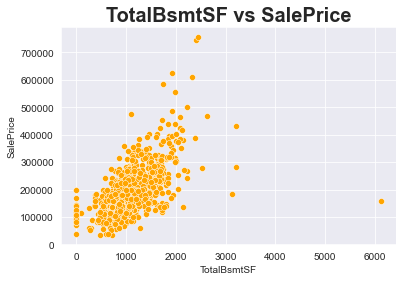

In [139]:
sns.set_style('darkgrid')
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'],color='Orange')
plt.title('TotalBsmtSF vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

For higher basement area price is also high which show positive relation.

Text(0.5, 1.0, '1stFlrSF vs SalePrice')

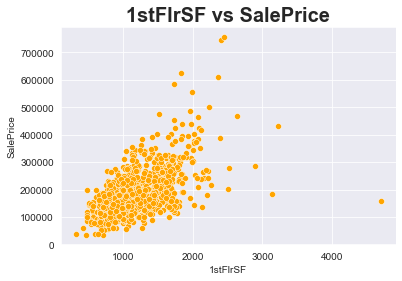

In [140]:
sns.set_style('darkgrid')
sns.scatterplot(df['1stFlrSF'],df['SalePrice'],color='Orange')
plt.title('1stFlrSF vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'OverallQual vs SalePrice')

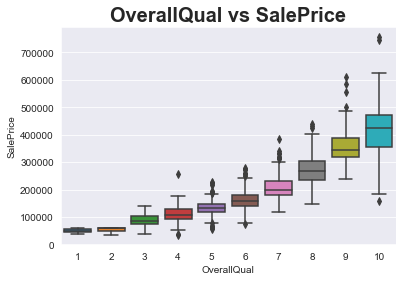

In [141]:
sns.set_style('darkgrid')
sns.boxplot(df['OverallQual'],df['SalePrice'])
plt.title('OverallQual vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

SalePrice is in relation with Quality.this chart shows as OverallQual increses saleprice also increases.

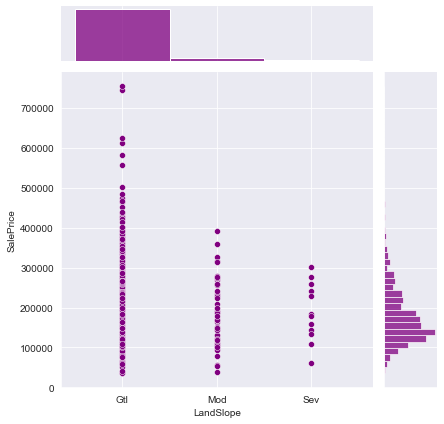

In [159]:
sns.jointplot(df['LandSlope'],df['SalePrice'],color='Purple')

From this chart we can see that People like to live in General Slope area and very few people live in Serve Slope Are.so density 
of the people increases in the General slope so prices are high there and serve slope like velly area fews people live there so
prices are usually low there.

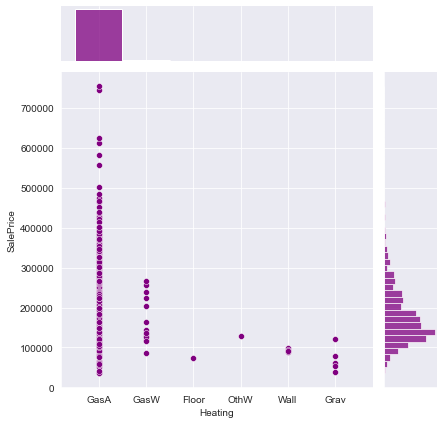

In [164]:
sns.jointplot(df['Heating'],df['SalePrice'],color='Purple')

Heating in the wall or hot water/steam is associated with very low houses prices. Gas Formed warm air appears to drive a higher sales price

Text(0.5, 1.0, 'Electrical Vs SalePrice Distribution')

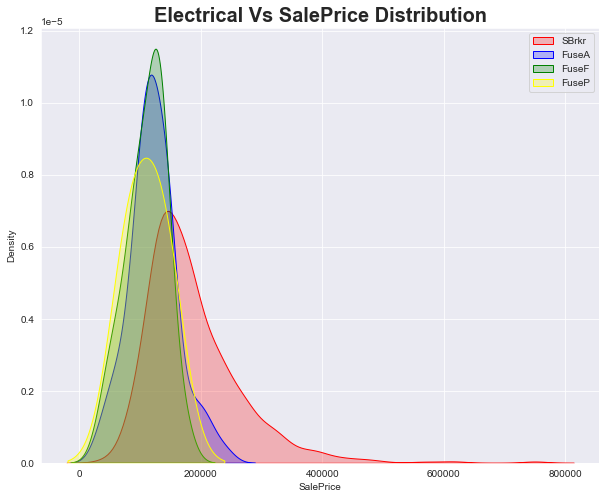

In [148]:
plt.figure(figsize=(10,8))
sns.kdeplot(df[df['Electrical']=='SBrkr']['SalePrice'],color='Red',shade=True)
sns.kdeplot(df[df['Electrical']=='FuseA']['SalePrice'],color='Blue',shade=True)
sns.kdeplot(df[df['Electrical']=='FuseF']['SalePrice'],color='Green',shade=True)
sns.kdeplot(df[df['Electrical']=='FuseP']['SalePrice'],color='Yellow',shade=True)
sns.kdeplot(df[df['Electrical']=='Mix']['SalePrice'],color='Orange',shade=True)
plt.legend(['SBrkr','FuseA','FuseF','FuseP','MIx'],loc='upper right')
plt.title('Electrical Vs SalePrice Distribution',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'GarageCars Vs SalePrice Distribution')

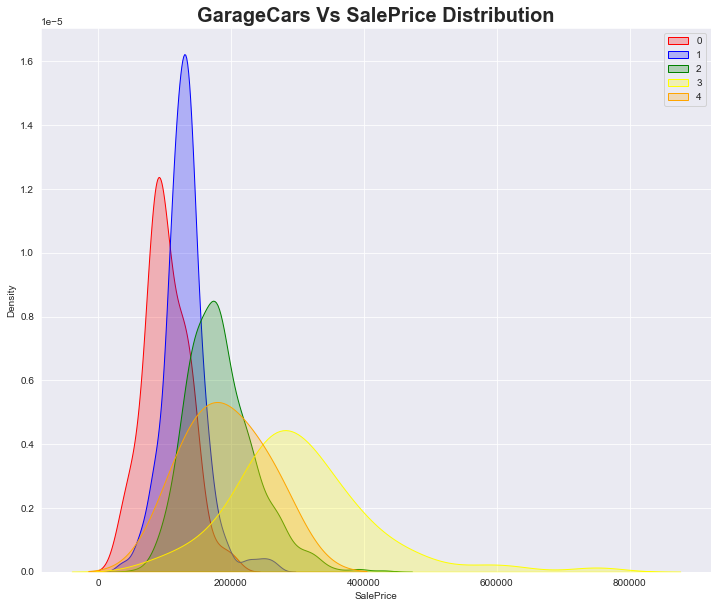

In [145]:
plt.figure(figsize=(12,10))
sns.kdeplot(df[df['GarageCars']==0]['SalePrice'],color='Red',shade=True)
sns.kdeplot(df[df['GarageCars']==1]['SalePrice'],color='Blue',shade=True)
sns.kdeplot(df[df['GarageCars']==2]['SalePrice'],color='Green',shade=True)
sns.kdeplot(df[df['GarageCars']==3]['SalePrice'],color='Yellow',shade=True)
sns.kdeplot(df[df['GarageCars']==4]['SalePrice'],color='Orange',shade=True)
plt.legend([0,1,2,3,4],loc='upper right')
plt.title('GarageCars Vs SalePrice Distribution',fontdict={'fontweight':'bold','fontsize':20})

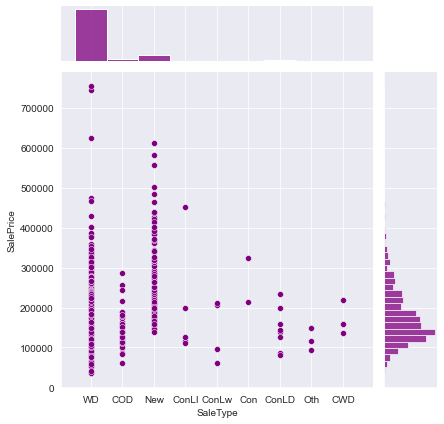

In [156]:
sns.jointplot(df['SaleType'],df['SalePrice'],color='purple')

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

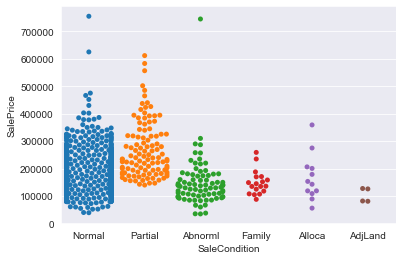

In [26]:
sns.swarmplot(df['SaleCondition'],df['SalePrice'])

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

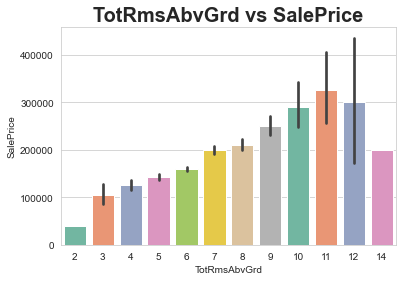

In [27]:
sns.set_style('whitegrid')
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=df,palette='Set2')
plt.title('TotRmsAbvGrd vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

From this graph we can see that as the no of rooms increases price also increases but once it reach to the 11 after that it will
decreases.

Text(0.5, 1.0, 'KitchenQual vs SalePrice')

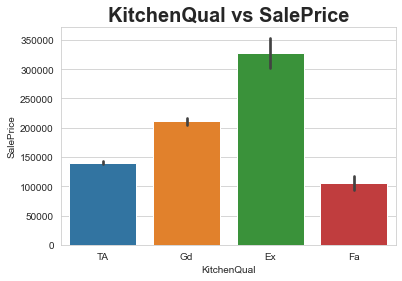

In [28]:
sns.set_style('whitegrid')
sns.barplot(x='KitchenQual',y='SalePrice',data=df)
plt.title('KitchenQual vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

AS Price for the Excellent Kitchend is very high.

Text(0.5, 1.0, 'FullBath vs SalePrice')

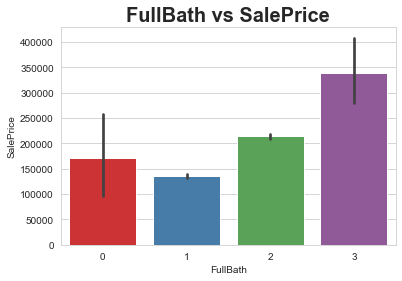

In [29]:
sns.set_style('whitegrid')
sns.barplot(x='FullBath',y='SalePrice',data=df,palette='Set1')
plt.title('FullBath vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Text(0.5, 1.0, 'FullBath vs SalePrice')

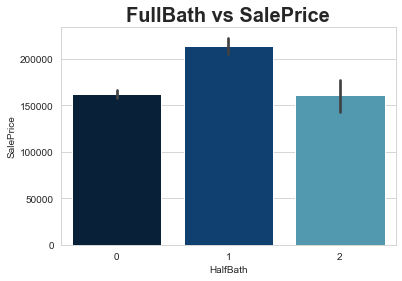

In [30]:
sns.set_style('whitegrid')
sns.barplot(x='HalfBath',y='SalePrice',data=df,palette='ocean')
plt.title('FullBath vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

As No of Bathroom Increases Price also increases.

Text(0.5, 1.0, 'GarageCars vs SalePrice')

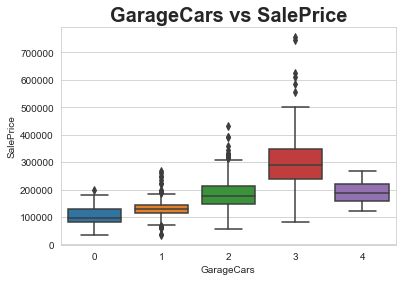

In [31]:
sns.set_style('whitegrid')
sns.boxplot(df['GarageCars'],df['SalePrice'])
plt.title('GarageCars vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Garagecars means size of capacity in Garage so as the capacity increases Price also Increases.

Text(0.5, 1.0, 'Fireplaces vs SalePrice')

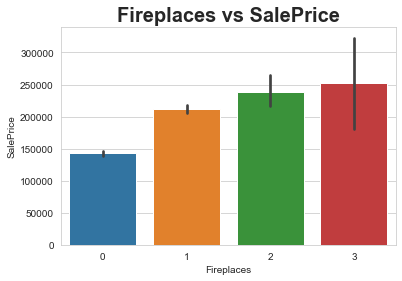

In [32]:
sns.set_style('whitegrid')
sns.barplot(x='Fireplaces',y='SalePrice',data=df)
plt.title('Fireplaces vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

As No of FierPlaces Increases Price Also Increases.

Text(0.5, 49.99999999999995, 'Street')

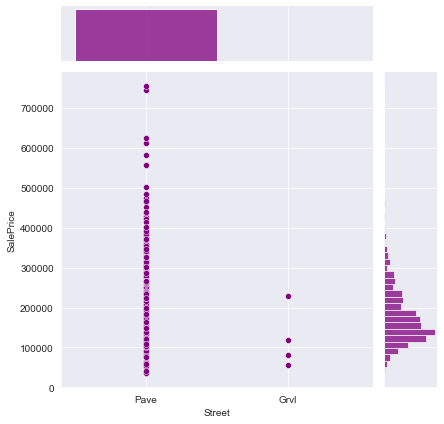

In [167]:
sns.jointplot(df['Street'],df['SalePrice'],color='Purple')

Most Of the People like to live in Paved type Street.

Text(0.5, 1.0, 'YrSold vs SalePrice')

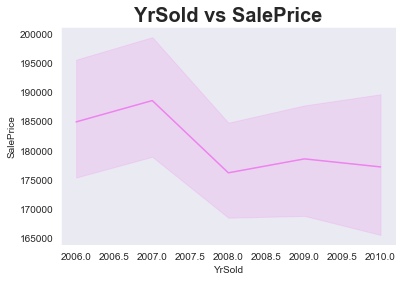

In [33]:
sns.set_style('dark')
sns.lineplot(x='YrSold',y='SalePrice',data=df,color='violet')
plt.title('YrSold vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Price increases from 2006-2007 and after 2007.

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

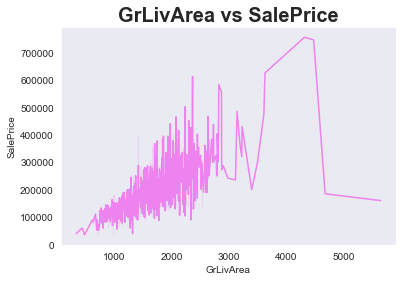

In [34]:
sns.set_style('dark')
sns.lineplot(x='GrLivArea',y='SalePrice',data=df,color='violet')
plt.title('GrLivArea vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

As above Grount Living area increases price of House also Increases.

Text(0.5, 1.0, 'YearRemodAdd vs SalePrice')

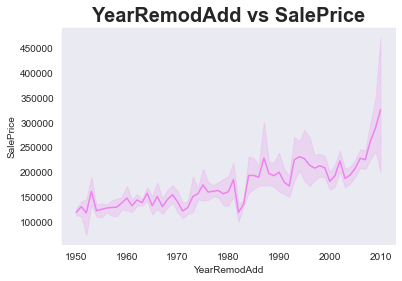

In [35]:
sns.set_style('dark')
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=df,color='violet')
plt.title('YearRemodAdd vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

YearRemoadd means Remodel Date and if not than construction date it means price of the house continuesly increases as year on passes.

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

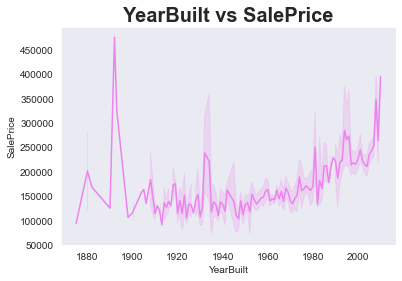

In [36]:
sns.set_style('dark')
sns.lineplot(x='YearBuilt',y='SalePrice',data=df,color='violet')
plt.title('YearBuilt vs SalePrice',fontdict={'fontweight':'bold','fontsize':20})

Price in 1890-1990 too much high after 1900 its sudden decreases.and than increases but it didnt reach previous high.

# Pre Processing

In [37]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

Columns whose having relation with SalePrice lessthan 0.1 will be droped.

In [38]:
del_col=[i for i in numerical_features if df.corr()['SalePrice'][i]<0.1]
del_col

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

In [39]:
#Drop That Columns.
df.drop(del_col,axis=1,inplace=True)

In [40]:
#Drop that columns from test data also
df1.drop(['MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

# Handling Missing Values

In [41]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df1['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [42]:
#Train
missing=['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
   'GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [43]:
#Test
missing1=['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
   'GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
#Train Data
imp=SimpleImputer(strategy='most_frequent')

for i in missing:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [46]:
#Test Data
imp=SimpleImputer(strategy='most_frequent')

for i in missing1:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

# Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
#Train Data
lb=LabelEncoder()

for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [49]:
#Test Data
lb=LabelEncoder()

for i in categorical_features1:
    df1[i]=lb.fit_transform(df1[i])

# Data Cleanning

Outliers Checking

In [50]:
pd.options.display.max_rows=99

In [51]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ab=(df<q1-(1.5*iqr))|(df>(q3+(1.5*iqr)))

In [52]:
count=[]
for i in ab:
    count.append(ab[i].value_counts())

In [53]:
print(count)

[False    928
True     240
Name: MSZoning, dtype: int64, False    1086
True       82
Name: LotFrontage, dtype: int64, False    1097
True       71
Name: LotArea, dtype: int64, False    1164
True        4
Name: Street, dtype: int64, False    1168
Name: LotShape, dtype: int64, False    1046
True      122
Name: LandContour, dtype: int64, False    1168
Name: Utilities, dtype: int64, False    1168
Name: LotConfig, dtype: int64, False    1105
True       63
Name: LandSlope, dtype: int64, False    1168
Name: Neighborhood, dtype: int64, False    1005
True      163
Name: Condition1, dtype: int64, False    1154
True       14
Name: Condition2, dtype: int64, False    981
True     187
Name: BldgType, dtype: int64, False    1168
Name: HouseStyle, dtype: int64, False    1166
True        2
Name: OverallQual, dtype: int64, False    1162
True        6
Name: YearBuilt, dtype: int64, False    1168
Name: YearRemodAdd, dtype: int64, False    915
True     253
Name: RoofStyle, dtype: int64, False    1144
True  

From Above we can count the Outliers present in features and drop them, whose having higher outliers and on relation with 
saleprice.

In [54]:
#Train Data
df.drop(['BsmtFinType2','ExterCond','BsmtCond','GarageQual','GarageCond','ScreenPorch'],axis=1,inplace=True)

In [55]:
#Test Data
df1.drop(['BsmtFinType2','ExterCond','BsmtCond','GarageQual','GarageCond','ScreenPorch'],axis=1,inplace=True)

# Checking Skewness & Removing

In [56]:
df.skew()

MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.835718
ExterQual        -1.810843
Foundation       -0.002761
BsmtQual         -1.343781
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
HeatingQC         0.449933
CentralAir       -3.475188
Electrical       -3.104209
1stFlrSF          1.513707
2ndFlrSF          0.823479
G

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

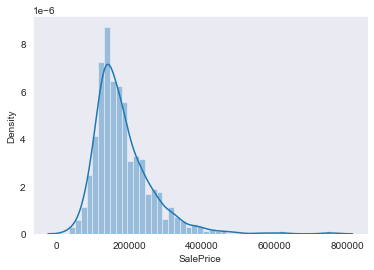

In [57]:
sns.distplot(df['SalePrice'])

In [58]:
df['SalePrice']=np.log(df['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

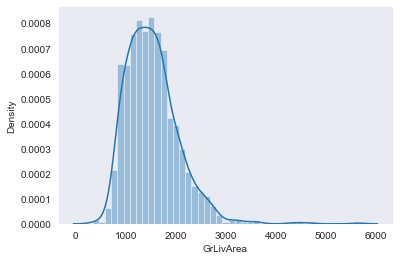

In [59]:
sns.distplot(df['GrLivArea'])

In [60]:
df['GrLivArea']=np.log(df['GrLivArea'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

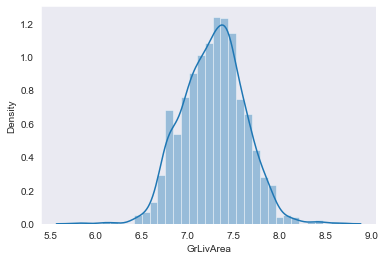

In [61]:
sns.distplot(df['GrLivArea'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

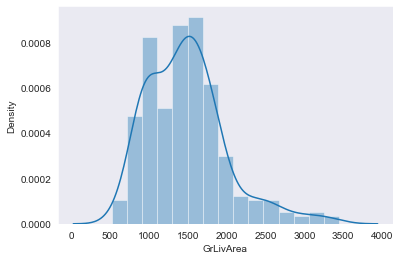

In [62]:
sns.distplot(df1['GrLivArea'])

In [63]:
df1['GrLivArea']=np.log(df1['GrLivArea'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

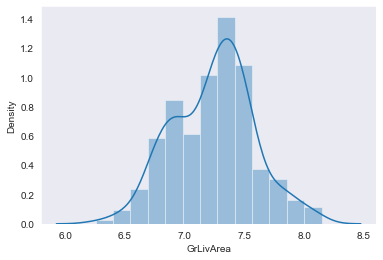

In [64]:
sns.distplot(df1['GrLivArea'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

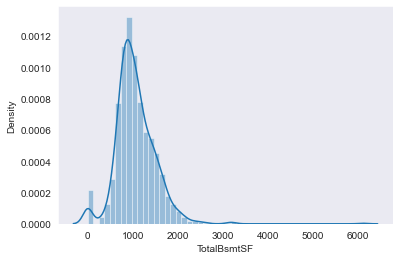

In [65]:
sns.distplot(df['TotalBsmtSF'])

In [66]:
df['TotalBsmtSF']=np.sqrt(df['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

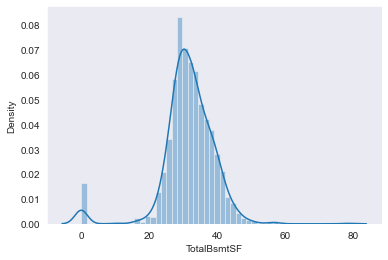

In [67]:
sns.distplot(df['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

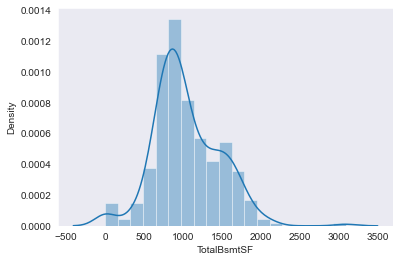

In [68]:
sns.distplot(df1['TotalBsmtSF'])

In [69]:
df1['TotalBsmtSF']=np.sqrt(df1['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

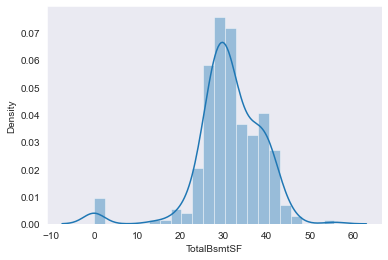

In [70]:
sns.distplot(df1['TotalBsmtSF'])

In [71]:
df.shape

(1168, 59)

In [72]:
#Split TrainData Into x and y
y=df['SalePrice']

In [73]:
x=df.drop('SalePrice',axis=1)

In [74]:
x1=df1

In [75]:
#test Dataset
x1.shape

(292, 58)

# Models

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [77]:
ln=LinearRegression()

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [79]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [80]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [81]:
#Install necessary Liberary
!pip install scikit-plot
import scikitplot as skplt

In [82]:
kf=KFold(n_splits=5,shuffle=True)
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    predt=f.predict(x_train)
    print('----',f,'----')
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Test Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('Cross Validation Score',cross_val_score(f,x,y,cv=kf).mean())
    r2=r2_score(y_test,pred)*100
    print('R2 Score',r2_score(y_test,pred)*100)
    print("Test Score",f.score(x_test,y_test)*100)
    print('Model Peformance Cure')
    skplt.estimators.plot_learning_curve(f,x,y,cv=kf,scoring='r2',text_fontsize='large')
    plt.show()

---- LinearRegression() ----
Taining Score:- 88.70483776932747
Mean Absolute Error 0.10489570257397161
Mean Squared Error 0.02438085116581712
Test Root Mean Squared Erro 0.15614368756314526
Cross Validation Score 0.839829663276876
R2 Score 85.13407416520414
Test Score 85.13407416520414
Model Peformance Cure


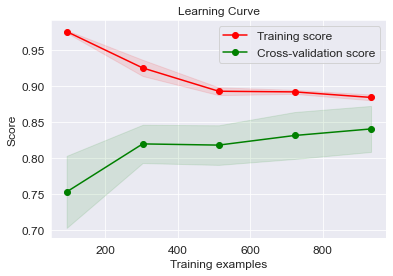

In [83]:
fun(ln)

---- SVR() ----
Taining Score:- 71.57179424176674
Mean Absolute Error 0.16105250169494686
Mean Squared Error 0.05087755035896133
Test Root Mean Squared Erro 0.225560524824184
Cross Validation Score 0.694658068686348
R2 Score 68.97803587133042
Test Score 68.97803587133042
Model Peformance Cure


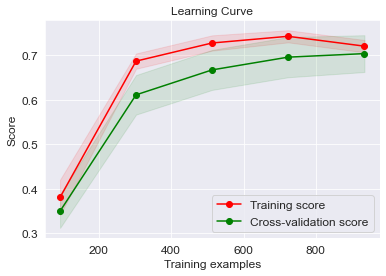

In [84]:
fun(svr)

---- SVR(kernel='poly') ----
Taining Score:- 42.93597637093487
Mean Absolute Error 0.24637070127929395
Mean Squared Error 0.11519142000323473
Test Root Mean Squared Erro 0.33939861520524023
Cross Validation Score -1.1872693458983192
R2 Score 29.76344037677422
Test Score 29.76344037677422
Model Peformance Cure


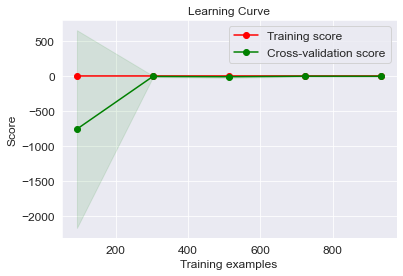

In [85]:
fun(svrp)

---- DecisionTreeRegressor() ----
Taining Score:- 100.0
Mean Absolute Error 0.15863183390629515
Mean Squared Error 0.05123723778955946
Test Root Mean Squared Erro 0.22635643969094288
Cross Validation Score 0.6906349493153403
R2 Score 68.75872085929028
Test Score 68.75872085929028
Model Peformance Cure


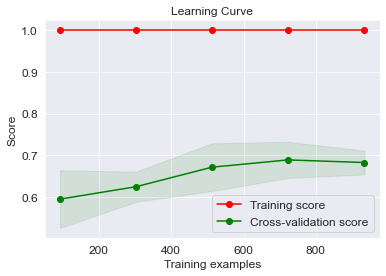

In [86]:
fun(dtc)

---- KNeighborsRegressor() ----
Taining Score:- 75.082254288179
Mean Absolute Error 0.18091989215225326
Mean Squared Error 0.06256620969288276
Test Root Mean Squared Erro 0.25013238433454144
Cross Validation Score 0.6216574505150142
R2 Score 61.85101878794441
Test Score 61.85101878794441
Model Peformance Cure


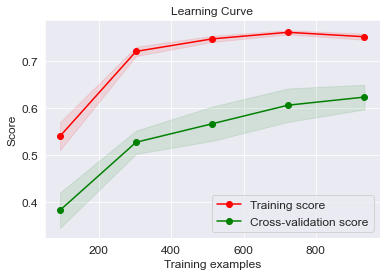

In [87]:
fun(knn)

# Regulization

In [88]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [89]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

---- Lasso() ----
Taining Score:- 75.09683826376731
Mean Absolute Error 0.1377955918856526
Mean Squared Error 0.043603989095831484
Test Root Mean Squared Erro 0.20881568211183632
Cross Validation Score 0.727530810441699
R2 Score 73.4130009001204
Test Score 73.4130009001204
Model Peformance Cure


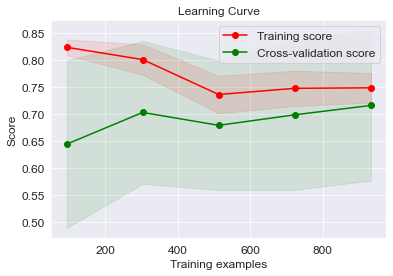

In [90]:
fun(ls)

---- Ridge() ----
Taining Score:- 88.67814940738063
Mean Absolute Error 0.10436437184030613
Mean Squared Error 0.02438450828479228
Test Root Mean Squared Erro 0.15615539787273536
Cross Validation Score 0.8205467282672743
R2 Score 85.13184428163346
Test Score 85.13184428163346
Model Peformance Cure


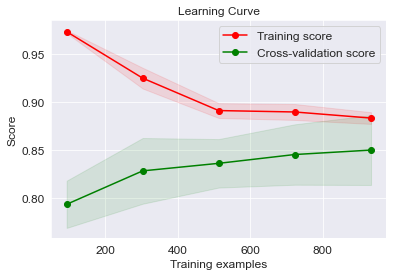

In [91]:
fun(rd)

---- ElasticNet() ----
Taining Score:- 76.76649657518082
Mean Absolute Error 0.13453626487951903
Mean Squared Error 0.042088131781311044
Test Root Mean Squared Erro 0.20515392216896816
Cross Validation Score 0.7361139946686597
R2 Score 74.33727635960018
Test Score 74.33727635960018
Model Peformance Cure


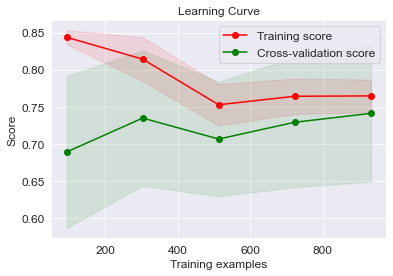

In [92]:
fun(es)

# Emsemble Method

In [93]:
#install Necessary Liberary
!pip install lightgbm

In [94]:
from lightgbm import LGBMRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import SGDRegressor

In [96]:
lgbm=LGBMRegressor()

In [97]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()
bg=BaggingRegressor()

---- RandomForestRegressor() ----
Taining Score:- 97.99481922466295
Mean Absolute Error 0.10861935300655037
Mean Squared Error 0.026607312913782915
Test Root Mean Squared Erro 0.16311748193796677
Cross Validation Score 0.8596777256888112
R2 Score 83.77651634270798
Test Score 83.77651634270798
Model Peformance Cure


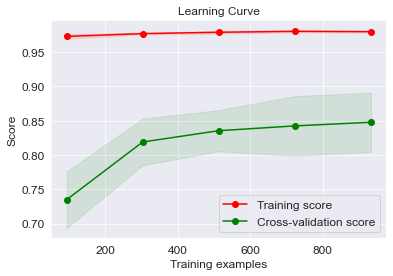

In [98]:
fun(rf)

---- AdaBoostRegressor() ----
Taining Score:- 86.38082788245859
Mean Absolute Error 0.1416451824329302
Mean Squared Error 0.035787777923592966
Test Root Mean Squared Erro 0.18917657868666768
Cross Validation Score 0.8010713285904225
R2 Score 78.17884007469814
Test Score 78.17884007469814
Model Peformance Cure


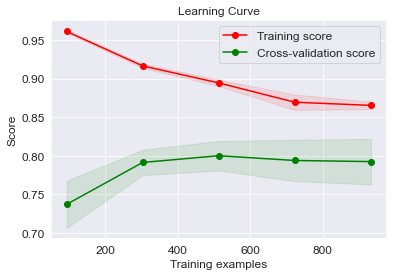

In [99]:
fun(ad)

---- GradientBoostingRegressor() ----
Taining Score:- 96.44253380396977
Mean Absolute Error 0.10018580104291665
Mean Squared Error 0.023146423130045897
Test Root Mean Squared Erro 0.1521394857689676
Cross Validation Score 0.8592038705623075
R2 Score 85.8867515636822
Test Score 85.8867515636822
Model Peformance Cure


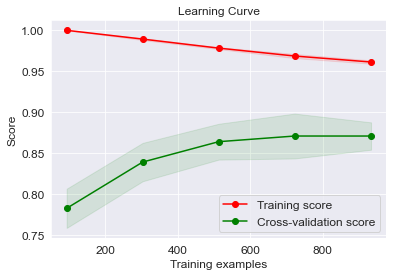

In [100]:
fun(gd)

---- SGDRegressor() ----
Taining Score:- -1.0688620944540088e+37
Mean Absolute Error 8.88298884093387e+16
Mean Squared Error 1.3876849254093245e+34
Test Root Mean Squared Erro 1.1780003927882726e+17
Cross Validation Score -8.735431591724276e+34
R2 Score -8.461239126926869e+36
Test Score -8.461239126926869e+36
Model Peformance Cure


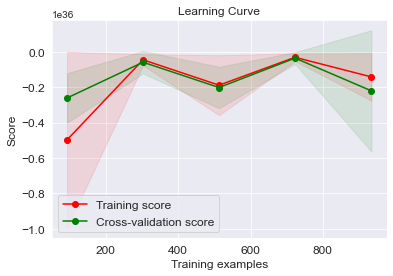

In [101]:
fun(sgd)

---- BaggingRegressor() ----
Taining Score:- 96.93907538278289
Mean Absolute Error 0.1153260872045807
Mean Squared Error 0.028179825529753316
Test Root Mean Squared Erro 0.1678684768792322
Cross Validation Score 0.836262046840994
R2 Score 82.81769600603033
Test Score 82.81769600603033
Model Peformance Cure


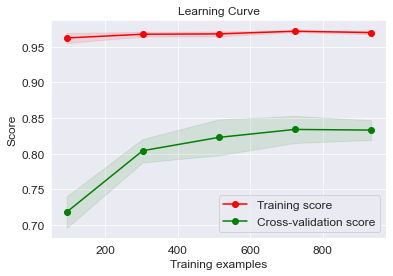

In [102]:
fun(bg)

---- LGBMRegressor() ----
Taining Score:- 98.54264613574392
Mean Absolute Error 0.09888246095729891
Mean Squared Error 0.02251315011592213
Test Root Mean Squared Erro 0.1500438273169614
Cross Validation Score 0.8616375896760398
R2 Score 86.27288203948528
Test Score 86.27288203948528
Model Peformance Cure


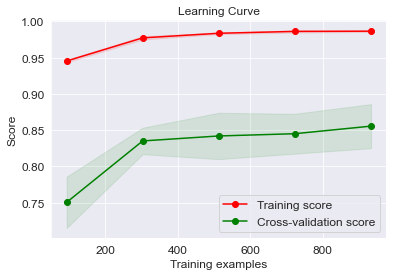

In [103]:
fun(lgbm)

# Hyper Tunnning For Best Score

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:

param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,200,500,600],
    'importance_type': ['mse','mae'],
    'max_depth': [-1,1,2,3,4,5]
}

In [106]:
GRID=GridSearchCV(estimator=lgbm,scoring='r2',param_grid=param,n_jobs=-1,cv=kf)

In [107]:
GRID.fit(x,y)

GRID.best_params_

{'boosting_type': 'gbdt',
 'importance_type': 'mse',
 'max_depth': 2,
 'n_estimators': 500}

In [108]:
lgbm1=LGBMRegressor(boosting_type='gbdt',importance_type='mse',max_depth=2,n_estimators=500)

---- LGBMRegressor(importance_type='mse', max_depth=8) ----
Taining Score:- 97.64843231443152
Mean Absolute Error 0.09967149265441701
Mean Squared Error 0.022385013235386997
Test Root Mean Squared Erro 0.14961621982721993
Cross Validation Score 0.8615233814391188
R2 Score 86.35101193535242
Test Score 86.35101193535242
Model Peformance Cure


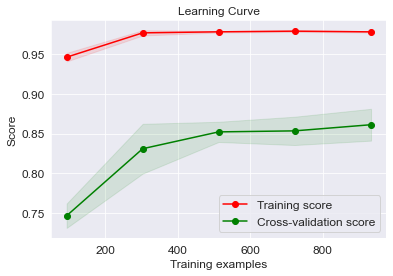

In [109]:
fun(lgbm1)

# Saving Model

In [158]:
Result=pd.DataFrame()
Result['Model Name']=['Linear Regression','DTC','KNN','Random Forest Regressor','AdaBoost Regressor','Gradient Boosting Regressor','LGBM Regressor','Lasso','Ridge']
Result['CV Score']=[0.823,0.687,0.619,0.855,0.800,0.862,0.860,0.72,0.839]
Result['R2 Score']=[85.13,67.25,61.85,83.78,79.66,86.34,86.27,73.41,85.13]
Result['Mean Absoluate Error']=[0.104,0.053,0.180,0.107,0.134,0.099,0.098,0.043,0.104]
Result['Root Mean Squared Error']=[0.156,0.231,0.250,0.163,0.182,0.150,0.146,0.208,0.156]
Result

,Model Name,CV Score,R2 Score,Mean Absoluate Error,Root Mean Squared Error
0,Linear Regression,0.823,85.13,0.104,0.156
1,DTC,0.687,67.25,0.053,0.231
2,KNN,0.619,61.85,0.180,0.250
3,Random Forest Regressor,0.855,83.78,0.107,0.163
4,AdaBoost Regressor,0.800,79.66,0.134,0.182
5,Gradient Boosting Regressor,0.862,86.34,0.099,0.150
6,LGBM Regressor,0.860,86.27,0.098,0.146
7,Lasso,0.720,73.41,0.043,0.208
8,Ridge,0.839,85.13,0.104,0.156


From this Chart we can see model like lasso and linear regressor having good score but they from their lerarning curve is decreases so 
its show underfitting.but in LGBM Regressor we get best score and also good learning curve.

In [111]:
import pickle
filename='Flip_House_Price_Prediction.pkl'
pickle.dump(lgbm1,open(filename,'wb'))

# Conclusion

Text(0.5, 1.0, 'LGBM Regressor')

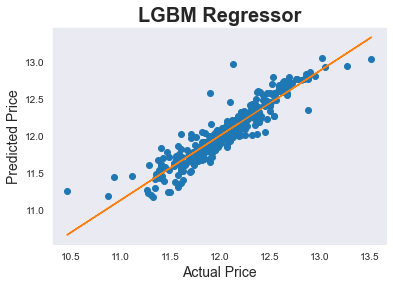

In [112]:
res=pd.DataFrame()
res['Actual']=np.expm1(y_test)
res['Predict']=np.expm1(lgbm1.predict(x_test))



x=y_test
y=lgbm1.predict(x_test)

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('LGBM Regressor',fontdict={'fontweight':'bold','fontsize':20})

# Apply Test Data Set

In [113]:
res=pd.DataFrame()
res['Predict']=np.expm1(lgbm1.predict(x1))

print(res)
x1['SalePrice']=res['Predict']

           Predict
0    345623.144562
1    188569.577068
2    256380.544285
3    191924.743630
4    190473.841477
..             ...
287  252039.364460
288  139565.678348
289  146148.494849
290  152421.699496
291  104474.187260

[292 rows x 1 columns]


In [114]:
x1

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,SaleType,SaleCondition,SalePrice
0,2,70.98847,14157,1,0,1,0,0,0,21,...,0,3,676,2,178,51,0,5,2,345623.144562
1,2,95.00000,5814,1,0,3,0,1,0,21,...,1,2,565,2,63,0,0,0,0,188569.577068
2,2,92.00000,11838,1,3,3,0,4,0,4,...,1,2,522,2,202,151,0,5,2,256380.544285
3,2,105.00000,12000,1,3,0,0,4,0,5,...,2,1,234,2,0,0,0,5,2,191924.743630
4,2,70.98847,14598,1,0,3,0,1,0,20,...,0,3,668,2,100,18,0,5,2,190473.841477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2,78.00000,10206,1,3,3,0,4,0,20,...,1,3,758,2,144,99,0,5,2,252039.364460
288,2,60.00000,9245,1,1,3,0,4,0,4,...,2,2,672,2,0,0,0,5,2,139565.678348
289,2,82.00000,11241,1,0,3,0,1,0,11,...,0,2,480,2,0,0,0,5,2,146148.494849
290,3,78.00000,5000,1,3,3,0,0,0,2,...,2,2,420,2,0,24,0,5,2,152421.699496


# Keys Observation:-
    
From this Project i understand on which  features price is affected and on which price not and observed many things:

As the Living area increases price also increases.

As Basement Are increases price also increases.

Price of the house having high Garagearea having high price.

Most of the people like Gas Base Furnace heating and its price is also high

Kitchen Quality-Excellent price is high.

As No of FirePlaces increases price also increases.

Room above the ground as room increases price increases but after the incremnet of 12 price decareses.



# Limitation  Learning Outcomes and Future Scope

As this model is based on Australian Market only this model you can not apply globally.

From this model i learn many things and for this model Tree base algorithm is mostly use.

Here dataset is small so i used KFold Value 5 but if for big dataset KFold Value will be 10.

Here Data set having also many missing values and for future score if i provide geological data like longitute and Latitude 
than i can visualize on Map so it will be more easy to under stand and having more impact.